# Quantum Fourier Transform (QFT)

This is the quantum implementation of the discrete Fourier Transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation (QPE).

## Intuition

Transforms between two bases, the computation (Z) basis and the Fourier basis. The H-gate is the single-qubit QFT, and it transforms between the Z-basis states |0> and |1> to the X-basis states |+> and |->. In the same way, all multi-qubit states in the computational basis have corresponding states in the Fourier basis.

### Counting the Fourier Basis

In the computational basis, we store numbers in binary using the states |0> and |1>

![z-basis-counting](https://qiskit.org/textbook/ch-algorithms/images/zbasis-counting.gif)

Note the frequency with which the different qubits change;
- The leftmost qubit flips with every increment in the number
- The next with every 2 increments
- The third with every 4 increments
- ...and so on...

In the Fourier basis, we store number usintg different rotations around the Z-axis:

![fourier-basis-counting](https://qiskit.org/textbook/ch-algorithms/images/fourierbasis-counting.gif)

The number we want to store dictates the angle at which each qubit is rotated around the Z-axis.

Note that the frequency with which each qubit changes, the leftmost qubit (`qubit=0`) has the lowest frequency, and the rightmost the highest (in this case)

## The Circuit that Implements the QFT

This makes use of two (2) gates. The first one is a single-qubit Hadamard gate, `H`, and the second is a two-qubit controller rotation `CROT`.

Given the two gates, a circuit that implements an n-qubit QFT is shown below

![qft-circuit](https://qiskit.org/textbook/ch-algorithms/images/qft.png)

This circuit operate as follows:

0. We state with an n-qubit input state |x_1 x_2 ... x_n>
1. After the first Hadamard gate on qubit 1, the state from the input state.
2. After the `UROT_2` gate on qubit 1 controlled by qubit 2, the state is transformed.
3. After the application of the last `UROT_n` gate on qubit1 controlled by qubit `n`, the state changes.
4. After the application of a similar sequence of gates for qubits 2 ... n, we find that the final state is exactly the QFT of the input state as derived, with the caveat that the order of the qubits is reversed in the output state.

### Form of the QFT Circuit

The example above demostrates a very useful form of the QFT for `N = 2^n`. Note that only the last qubit depends on the values of all the other input qubits and each further bit depends less and less on the input qubits. This becomes important in physical implementations of the QFT, where nearest-neighbor couplings are easier to achieve than distant couplings between the qubits.

Additionally, as the QFT circuit becomes large, an increasing amount of time is spent doing increasingly slight rotations. it turns out that we can ignore rotations below a certain threshold and still get decent results. This is knows as the approximate QFT. This is also important in physical implementations, as reducing the number of operations can greatly reduce decoherence and potential gate errors.

### Qiskit Implementation

The implementation of the `CROT` gate used in the discussion above is a controlled phase rotation gate.

#### Example on 3 Qubits

In [1]:
import numpy as np
from numpy import pi
# Aer is a high performance simulator for quantum circuits that includes noise models.
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

It is useful to work out the relevant code for the 3-qubit case before generalizing to the n-qubit case. First, we must define our quantum circuit:

In [2]:
qc = QuantumCircuit(3)

Qiskit's least significant bit has the lowest index (0), this the circuit will be mirrored through horizontally in relation to the image of the circuit that implements the QFT. First, we apply a H-gate to qubit 2:

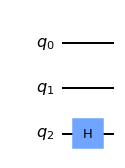

In [3]:
qc.h(2)
qc.draw()